# Imports & Constants

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt

RESULTS_DIR = "./results/"

# Join the CSV Files

In [4]:
files = [f for f in os.listdir(RESULTS_DIR) if f.endswith(".csv")]

In [14]:
# Init a df for storing all the results
combined_df = pd.DataFrame()

for filename in files:
    file_path = os.path.join(RESULTS_DIR, filename)

    # Read the CSV into a dataframe
    temp_df = pd.read_csv(file_path, index_col=0)
    temp_df.reset_index(drop=True, inplace=True)

    # Append the tmp df to the main df.
    combined_df = pd.concat([combined_df, temp_df], axis=1, sort=False)

# Analysis & Plot

In [28]:
# Get the minimum number of episodes
min_col_length = combined_df.count().min()

# Truncate the df to the minimum number of episodes experienced.
truncated_df = combined_df.iloc[:min_col_length]

# Calculate the rolling mean.
rolling_mean_df = truncated_df.rolling(400).mean()

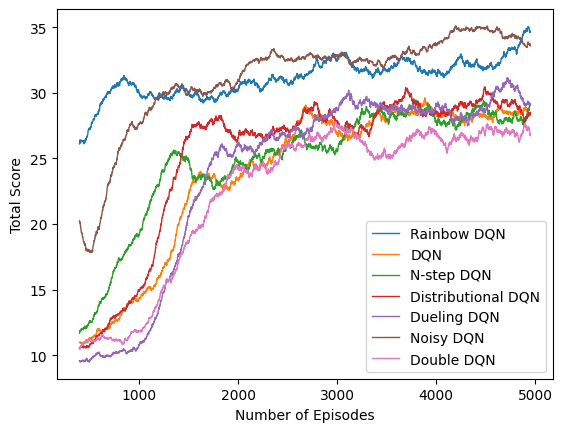

In [30]:
ax = rolling_mean_df.plot(linewidth=1)

# Set y- and x-axis labels
ax.set_xlabel("Number of Episodes")
ax.set_ylabel("Total Score")

plt.show()